## Timeframe 1

In [1]:
import pandas as pd
df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')
df = df.drop_duplicates()
start_Stime = 1421927503    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 60))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_1_4_1_3_1_2_1_1.add_node(src_node)
    attackG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_1_4_1_3_1_2_1_1.add_node(src_node)
    nonattackG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_1_4_1_3_1_2_1_1.add_node(src_node)
    overallG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)

C:\Users\sathi\AppData\Local\Temp\ipykernel_5600\1101762970.py:2: DtypeWarning: Columns (1,3,38,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Project Phase II\Dataset\cleaneddataset.csv",encoding='cp1252')


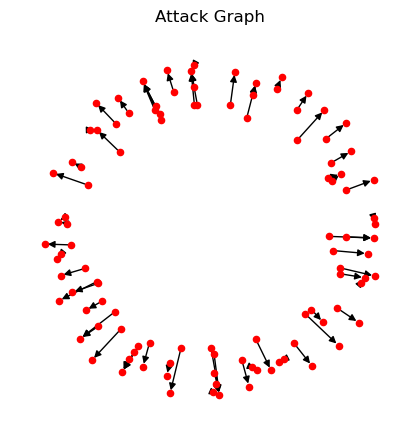

In [6]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4, 4))
pos = nx.spring_layout(attackG_1_4_1_3_1_2_1_1)
nx.draw(attackG_1_4_1_3_1_2_1_1, pos, with_labels=False, node_size=20, node_color = "red")
plt.title("Attack Graph")
plt.show()


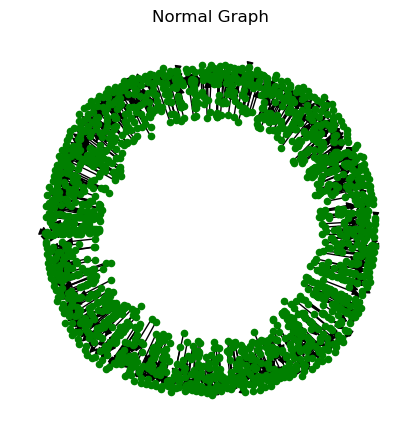

In [7]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4,4))
pos = nx.spring_layout(nonattackG_1_4_1_3_1_2_1_1)
nx.draw(nonattackG_1_4_1_3_1_2_1_1, pos, with_labels=False, node_size=20, node_color='green')
plt.title("Normal Graph")
plt.show()

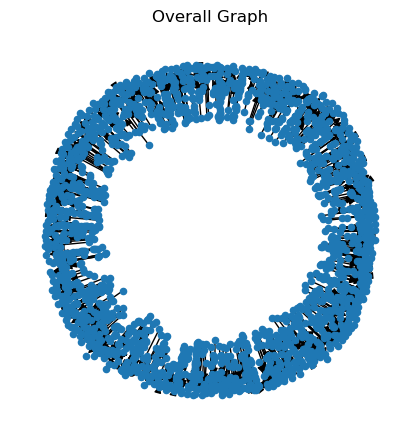

In [4]:
import matplotlib.pyplot as plt

# Draw the graph
plt.figure(figsize=(4,4))
pos = nx.spring_layout(overallG_1_4_1_3_1_2_1_1)
nx.draw(overallG_1_4_1_3_1_2_1_1, pos, with_labels=False, node_size=20)
plt.title("Overall Graph")
plt.show()

In [21]:
#Print number of nodes and edges in each graph
print("Number of nodes and edges in attack graph: ")
print(nx.number_of_nodes(attackG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(attackG_1_4_1_3_1_2_1_1))
print("Number of nodes and edges in non attack graph: ")
print(nx.number_of_nodes(nonattackG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(nonattackG_1_4_1_3_1_2_1_1))
print("Number of nodes and edges in overall graph: ")
print(nx.number_of_nodes(overallG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(overallG_1_4_1_3_1_2_1_1))


Number of nodes and edges in attack graph: 
107
63
Number of nodes and edges in non attack graph: 
1837
1283
Number of nodes and edges in overall graph: 
1944
1346


In [22]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_1_4_1_3_1_2_1_1)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_1_4_1_3_1_2_1_1)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_1_4_1_3_1_2_1_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_1_4_1_3_1_2_1_1)
avg_clustering_non_attack = nx.average_clustering(nonattackG_1_4_1_3_1_2_1_1)
avg_clustering_overall = nx.average_clustering(overallG_1_4_1_3_1_2_1_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_in_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_in_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_out_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_out_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_pagerank_overall = sum(nx.pagerank(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_1_4_1_3_1_2_1_1)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2_1_1)
avg_shortest_path_overall = calculate_diameter(overallG_1_4_1_3_1_2_1_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_1_4_1_3_1_2_1_1)
density_non_attack = nx.density(nonattackG_1_4_1_3_1_2_1_1)
density_overall = nx.density(overallG_1_4_1_3_1_2_1_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_1_4_1_3_1_2_1_1)
diameter_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2_1_1)
diameter_overall = calculate_diameter(overallG_1_4_1_3_1_2_1_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_1_4_1_3_1_2_1_1)
num_louvain_non_attack = detect_communities(nonattackG_1_4_1_3_1_2_1_1)
num_louvain_overall = detect_communities(overallG_1_4_1_3_1_2_1_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_1_4_1_3_1_2_1_1)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_1_4_1_3_1_2_1_1)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_1_4_1_3_1_2_1_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_1_4_1_3_1_2_1_1)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_1_4_1_3_1_2_1_1)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_1_4_1_3_1_2_1_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_1_4_1_3_1_2_1_1)
reciprocity_non_attack = calculate_reciprocity(nonattackG_1_4_1_3_1_2_1_1)
reciprocity_overall = calculate_reciprocity(overallG_1_4_1_3_1_2_1_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: inf
Assortativity coefficient for overall graph: nan
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 1.6157795166215253e-10
Average betweenness centrality for overall graph: 1.363269483527363e-10
Average closeness centrality for attack graph: 0.005554575912537471
Average closeness centrality for non-attack graph: 0.00038050261133506754
Average closeness centrality for overall graph: 0.00035643762173947076
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.1775700934579438
Average degree for non-attack graph: 1.396842678279804
Average degree for overall graph: 1.3847736625514404
Average degree centrality for attack graph: 0.011109151825074961
Average degree centrality for non-attack graph: 

## Timeframe 2

In [2]:
start_Stime = 1424251782     
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 60))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_1_4_1_3_1_2_1_1.add_node(src_node)
    attackG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_1_4_1_3_1_2_1_1.add_node(src_node)
    nonattackG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_1_4_1_3_1_2_1_1 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_1_4_1_3_1_2_1_1.add_node(src_node)
    overallG_1_4_1_3_1_2_1_1.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_1_4_1_3_1_2_1_1.add_edge(src_node, dst_node, weight=edge_weight)

In [3]:
# print number of nodes and edges i each graph
print("Number of nodes and edges in attack graph: ")
print(nx.number_of_nodes(attackG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(attackG_1_4_1_3_1_2_1_1))
print("Number of nodes and edges in non attack graph: ")
print(nx.number_of_nodes(nonattackG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(nonattackG_1_4_1_3_1_2_1_1))
print("Number of nodes and edges in overall graph: ")
print(nx.number_of_nodes(overallG_1_4_1_3_1_2_1_1))
print(nx.number_of_edges(overallG_1_4_1_3_1_2_1_1))

Number of nodes and edges in attack graph: 
113
69
Number of nodes and edges in non attack graph: 
2160
1516
Number of nodes and edges in overall graph: 
2271
1585


In [25]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_1_4_1_3_1_2_1_1)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_1_4_1_3_1_2_1_1)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_1_4_1_3_1_2_1_1)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_1_4_1_3_1_2_1_1)
avg_clustering_non_attack = nx.average_clustering(nonattackG_1_4_1_3_1_2_1_1)
avg_clustering_overall = nx.average_clustering(overallG_1_4_1_3_1_2_1_1)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_in_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_in_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.in_degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_out_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_out_degree_overall = sum(dict(overallG_1_4_1_3_1_2_1_1.out_degree()).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_1_4_1_3_1_2_1_1).values()) / len(attackG_1_4_1_3_1_2_1_1)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_1_4_1_3_1_2_1_1).values()) / len(nonattackG_1_4_1_3_1_2_1_1)
avg_pagerank_overall = sum(nx.pagerank(overallG_1_4_1_3_1_2_1_1).values()) / len(overallG_1_4_1_3_1_2_1_1)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_1_4_1_3_1_2_1_1)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2_1_1)
avg_shortest_path_overall = calculate_diameter(overallG_1_4_1_3_1_2_1_1)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_1_4_1_3_1_2_1_1)
density_non_attack = nx.density(nonattackG_1_4_1_3_1_2_1_1)
density_overall = nx.density(overallG_1_4_1_3_1_2_1_1)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_1_4_1_3_1_2_1_1)
diameter_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2_1_1)
diameter_overall = calculate_diameter(overallG_1_4_1_3_1_2_1_1)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_1_4_1_3_1_2_1_1)
num_louvain_non_attack = detect_communities(nonattackG_1_4_1_3_1_2_1_1)
num_louvain_overall = detect_communities(overallG_1_4_1_3_1_2_1_1)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_1_4_1_3_1_2_1_1)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_1_4_1_3_1_2_1_1)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_1_4_1_3_1_2_1_1)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_1_4_1_3_1_2_1_1)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_1_4_1_3_1_2_1_1)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_1_4_1_3_1_2_1_1)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_1_4_1_3_1_2_1_1)
reciprocity_non_attack = calculate_reciprocity(nonattackG_1_4_1_3_1_2_1_1)
reciprocity_overall = calculate_reciprocity(overallG_1_4_1_3_1_2_1_1)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: nan
Assortativity coefficient for overall graph: nan
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 9.936699725033235e-11
Average betweenness centrality for overall graph: 8.549141645532611e-11
Average closeness centrality for attack graph: 0.0054519595448799
Average closeness centrality for non-attack graph: 0.00032515339177373716
Average closeness centrality for overall graph: 0.0003075229979483451
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.2212389380530972
Average degree for non-attack graph: 1.4037037037037037
Average degree for overall graph: 1.3958608542492295
Average degree centrality for attack graph: 0.010903919089759784
Average degree centrality for non-attack graph: 0.0

## Timeframe 3

In [26]:
start_Stime = 1421927504  
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 60))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_1_4_1_3_1_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_1_4_1_3_1_2.add_node(src_node)
    attackG_1_4_1_3_1_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_1_4_1_3_1_2.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_1_4_1_3_1_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_1_4_1_3_1_2.add_node(src_node)
    nonattackG_1_4_1_3_1_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_1_4_1_3_1_2.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_1_4_1_3_1_2 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_1_4_1_3_1_2.add_node(src_node)
    overallG_1_4_1_3_1_2.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_1_4_1_3_1_2.add_edge(src_node, dst_node, weight=edge_weight)

In [27]:
#print number of nodes and edges in each graph
print("Number of nodes and edges in attack graph: ")
print(nx.number_of_nodes(attackG_1_4_1_3_1_2))
print(nx.number_of_edges(attackG_1_4_1_3_1_2))
print("Number of nodes and edges in non attack graph: ")
print(nx.number_of_nodes(nonattackG_1_4_1_3_1_2))
print(nx.number_of_edges(nonattackG_1_4_1_3_1_2))
print("Number of nodes and edges in overall graph: ")
print(nx.number_of_nodes(overallG_1_4_1_3_1_2))
print(nx.number_of_edges(overallG_1_4_1_3_1_2))

Number of nodes and edges in attack graph: 
106
62
Number of nodes and edges in non attack graph: 
1839
1284
Number of nodes and edges in overall graph: 
1945
1346


In [28]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_1_4_1_3_1_2)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_1_4_1_3_1_2)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_1_4_1_3_1_2)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_1_4_1_3_1_2).values()) / len(attackG_1_4_1_3_1_2)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_1_4_1_3_1_2).values()) / len(nonattackG_1_4_1_3_1_2)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_1_4_1_3_1_2).values()) / len(overallG_1_4_1_3_1_2)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_1_4_1_3_1_2).values()) / len(attackG_1_4_1_3_1_2)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_1_4_1_3_1_2).values()) / len(nonattackG_1_4_1_3_1_2)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_1_4_1_3_1_2).values()) / len(overallG_1_4_1_3_1_2)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_1_4_1_3_1_2)
avg_clustering_non_attack = nx.average_clustering(nonattackG_1_4_1_3_1_2)
avg_clustering_overall = nx.average_clustering(overallG_1_4_1_3_1_2)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_1_4_1_3_1_2.degree()).values()) / len(attackG_1_4_1_3_1_2)
avg_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2.degree()).values()) / len(nonattackG_1_4_1_3_1_2)
avg_degree_overall = sum(dict(overallG_1_4_1_3_1_2.degree()).values()) / len(overallG_1_4_1_3_1_2)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_1_4_1_3_1_2).values()) / len(attackG_1_4_1_3_1_2)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_1_4_1_3_1_2).values()) / len(nonattackG_1_4_1_3_1_2)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_1_4_1_3_1_2).values()) / len(overallG_1_4_1_3_1_2)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
try:
    avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_1_4_1_3_1_2).values()) / len(attackG_1_4_1_3_1_2)
except:
    avg_eigenvector_attack = None
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_1_4_1_3_1_2).values()) / len(nonattackG_1_4_1_3_1_2)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_1_4_1_3_1_2).values()) / len(overallG_1_4_1_3_1_2)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_1_4_1_3_1_2.in_degree()).values()) / len(attackG_1_4_1_3_1_2)
avg_in_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2.in_degree()).values()) / len(nonattackG_1_4_1_3_1_2)
avg_in_degree_overall = sum(dict(overallG_1_4_1_3_1_2.in_degree()).values()) / len(overallG_1_4_1_3_1_2)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_1_4_1_3_1_2.out_degree()).values()) / len(attackG_1_4_1_3_1_2)
avg_out_degree_non_attack = sum(dict(nonattackG_1_4_1_3_1_2.out_degree()).values()) / len(nonattackG_1_4_1_3_1_2)
avg_out_degree_overall = sum(dict(overallG_1_4_1_3_1_2.out_degree()).values()) / len(overallG_1_4_1_3_1_2)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_1_4_1_3_1_2).values()) / len(attackG_1_4_1_3_1_2)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_1_4_1_3_1_2).values()) / len(nonattackG_1_4_1_3_1_2)
avg_pagerank_overall = sum(nx.pagerank(overallG_1_4_1_3_1_2).values()) / len(overallG_1_4_1_3_1_2)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_1_4_1_3_1_2)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2)
avg_shortest_path_overall = calculate_diameter(overallG_1_4_1_3_1_2)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_1_4_1_3_1_2)
density_non_attack = nx.density(nonattackG_1_4_1_3_1_2)
density_overall = nx.density(overallG_1_4_1_3_1_2)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_1_4_1_3_1_2)
diameter_non_attack = calculate_diameter(nonattackG_1_4_1_3_1_2)
diameter_overall = calculate_diameter(overallG_1_4_1_3_1_2)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_1_4_1_3_1_2)
num_louvain_non_attack = detect_communities(nonattackG_1_4_1_3_1_2)
num_louvain_overall = detect_communities(overallG_1_4_1_3_1_2)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_1_4_1_3_1_2)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_1_4_1_3_1_2)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_1_4_1_3_1_2)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_1_4_1_3_1_2)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_1_4_1_3_1_2)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_1_4_1_3_1_2)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_1_4_1_3_1_2)
reciprocity_non_attack = calculate_reciprocity(nonattackG_1_4_1_3_1_2)
reciprocity_overall = calculate_reciprocity(overallG_1_4_1_3_1_2)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: nan
Assortativity coefficient for overall graph: inf
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 1.6105106734892575e-10
Average betweenness centrality for overall graph: 1.361166754246858e-10
Average closeness centrality for attack graph: 0.005570530098831986
Average closeness centrality for non-attack graph: 0.00037997105790135336
Average closeness centrality for overall graph: 0.0003560711049047756
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.169811320754717
Average degree for non-attack graph: 1.3964110929853182
Average degree for overall graph: 1.3840616966580976
Average degree centrality for attack graph: 0.011141060197663958
Average degree centrality for non-attack graph: 0

## Timeframe 4

In [29]:
start_Stime = 1424230536    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 60))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_1_4_1_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_1_4_1_3.add_node(src_node)
    attackG_1_4_1_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_1_4_1_3.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_1_4_1_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_1_4_1_3.add_node(src_node)
    nonattackG_1_4_1_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_1_4_1_3.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_1_4_1_3 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_1_4_1_3.add_node(src_node)
    overallG_1_4_1_3.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_1_4_1_3.add_edge(src_node, dst_node, weight=edge_weight)

In [30]:
#print number of nodes and edges in each graph
print("Number of nodes and edges in attack graph: ")
print(nx.number_of_nodes(attackG_1_4_1_3))
print(nx.number_of_edges(attackG_1_4_1_3))
print("Number of nodes and edges in non attack graph: ")
print(nx.number_of_nodes(nonattackG_1_4_1_3))
print(nx.number_of_edges(nonattackG_1_4_1_3))
print("Number of nodes and edges in overall graph: ")
print(nx.number_of_nodes(overallG_1_4_1_3))
print(nx.number_of_edges(overallG_1_4_1_3))

Number of nodes and edges in attack graph: 
119
82
Number of nodes and edges in non attack graph: 
2088
1407
Number of nodes and edges in overall graph: 
2204
1489


In [32]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_1_4_1_3)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_1_4_1_3)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_1_4_1_3)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_1_4_1_3).values()) / len(attackG_1_4_1_3)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_1_4_1_3).values()) / len(nonattackG_1_4_1_3)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_1_4_1_3).values()) / len(overallG_1_4_1_3)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_1_4_1_3).values()) / len(attackG_1_4_1_3)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_1_4_1_3).values()) / len(nonattackG_1_4_1_3)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_1_4_1_3).values()) / len(overallG_1_4_1_3)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_1_4_1_3)
avg_clustering_non_attack = nx.average_clustering(nonattackG_1_4_1_3)
avg_clustering_overall = nx.average_clustering(overallG_1_4_1_3)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_1_4_1_3.degree()).values()) / len(attackG_1_4_1_3)
avg_degree_non_attack = sum(dict(nonattackG_1_4_1_3.degree()).values()) / len(nonattackG_1_4_1_3)
avg_degree_overall = sum(dict(overallG_1_4_1_3.degree()).values()) / len(overallG_1_4_1_3)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_1_4_1_3).values()) / len(attackG_1_4_1_3)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_1_4_1_3).values()) / len(nonattackG_1_4_1_3)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_1_4_1_3).values()) / len(overallG_1_4_1_3)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_1_4_1_3).values()) / len(attackG_1_4_1_3)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_1_4_1_3).values()) / len(nonattackG_1_4_1_3)
try:
    avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_1_4_1_3).values()) / len(overallG_1_4_1_3)
except:
    avg_eigenvector_overall = None

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_1_4_1_3.in_degree()).values()) / len(attackG_1_4_1_3)
avg_in_degree_non_attack = sum(dict(nonattackG_1_4_1_3.in_degree()).values()) / len(nonattackG_1_4_1_3)
avg_in_degree_overall = sum(dict(overallG_1_4_1_3.in_degree()).values()) / len(overallG_1_4_1_3)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_1_4_1_3.out_degree()).values()) / len(attackG_1_4_1_3)
avg_out_degree_non_attack = sum(dict(nonattackG_1_4_1_3.out_degree()).values()) / len(nonattackG_1_4_1_3)
avg_out_degree_overall = sum(dict(overallG_1_4_1_3.out_degree()).values()) / len(overallG_1_4_1_3)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_1_4_1_3).values()) / len(attackG_1_4_1_3)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_1_4_1_3).values()) / len(nonattackG_1_4_1_3)
avg_pagerank_overall = sum(nx.pagerank(overallG_1_4_1_3).values()) / len(overallG_1_4_1_3)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_1_4_1_3)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_1_4_1_3)
avg_shortest_path_overall = calculate_diameter(overallG_1_4_1_3)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_1_4_1_3)
density_non_attack = nx.density(nonattackG_1_4_1_3)
density_overall = nx.density(overallG_1_4_1_3)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_1_4_1_3)
diameter_non_attack = calculate_diameter(nonattackG_1_4_1_3)
diameter_overall = calculate_diameter(overallG_1_4_1_3)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_1_4_1_3)
num_louvain_non_attack = detect_communities(nonattackG_1_4_1_3)
num_louvain_overall = detect_communities(overallG_1_4_1_3)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_1_4_1_3)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_1_4_1_3)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_1_4_1_3)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_1_4_1_3)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_1_4_1_3)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_1_4_1_3)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_1_4_1_3)
reciprocity_non_attack = calculate_reciprocity(nonattackG_1_4_1_3)
reciprocity_overall = calculate_reciprocity(overallG_1_4_1_3)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: -0.0038270099806939763
Assortativity coefficient for overall graph: -0.005858241385635183
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 0.0
Average betweenness centrality for overall graph: 0.0
Average closeness centrality for attack graph: 0.0058396239851872915
Average closeness centrality for non-attack graph: 0.00032288000704965654
Average closeness centrality for overall graph: 0.0003066681056108111
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.3781512605042017
Average degree for non-attack graph: 1.3477011494252873
Average degree for overall graph: 1.351179673321234
Average degree centrality for attack graph: 0.011679247970374573
Average degree centrality for non-attack graph: 

## Timeframe 5

In [33]:
start_Stime = 1424219949    
df1 = df[(df['Stime'] >= start_Stime) & (df['Ltime'] <= (start_Stime + 60))]

df1_label_true = df1[df1['Label'] == 1]
df1_label_false = df1[df1['Label'] == 0]
df1_label_false_grouped = df1_label_false.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_label_true_grouped = df1_label_true.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')
df1_grouped = df1.groupby(['srcip', 'sport', 'dstip', 'dsport']).size().reset_index(name='count')

import networkx as nx
# Create an empty graph
attackG_1_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    attackG_1_4.add_node(src_node)
    attackG_1_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_true_grouped)):
    src_node = str(df1_label_true_grouped['srcip'][i]) + ':' + str(df1_label_true_grouped['sport'][i])
    dst_node = str(df1_label_true_grouped['dstip'][i]) + ':' + str(df1_label_true_grouped['dsport'][i])
    edge_weight = df1_label_true_grouped['count'][i]
    attackG_1_4.add_edge(src_node, dst_node, weight=edge_weight)


import networkx as nx
# Create an empty graph
nonattackG_1_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    nonattackG_1_4.add_node(src_node)
    nonattackG_1_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_label_false_grouped)):
    src_node = str(df1_label_false_grouped['srcip'][i]) + ':' + str(df1_label_false_grouped['sport'][i])
    dst_node = str(df1_label_false_grouped['dstip'][i]) + ':' + str(df1_label_false_grouped['dsport'][i])
    edge_weight = df1_label_false_grouped['count'][i]
    nonattackG_1_4.add_edge(src_node, dst_node, weight=edge_weight)

import networkx as nx
# Create an empty graph
overallG_1_4 = nx.DiGraph()

# Add nodes to the graph
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    overallG_1_4.add_node(src_node)
    overallG_1_4.add_node(dst_node)

# Add edges to the graph with edge weight as count
for i in range(len(df1_grouped)):
    src_node = str(df1_grouped['srcip'][i]) + ':' + str(df1_grouped['sport'][i])
    dst_node = str(df1_grouped['dstip'][i]) + ':' + str(df1_grouped['dsport'][i])
    edge_weight = df1_grouped['count'][i]
    overallG_1_4.add_edge(src_node, dst_node, weight=edge_weight)

In [34]:
#print number of nodes and edges in each graph
print("Number of nodes and edges in attack graph: ")
print(nx.number_of_nodes(attackG_1_4))
print(nx.number_of_edges(attackG_1_4))
print("Number of nodes and edges in non attack graph: ")
print(nx.number_of_nodes(nonattackG_1_4))
print(nx.number_of_edges(nonattackG_1_4))
print("Number of nodes and edges in overall graph: ")
print(nx.number_of_nodes(overallG_1_4))
print(nx.number_of_edges(overallG_1_4))

Number of nodes and edges in attack graph: 
109
63
Number of nodes and edges in non attack graph: 
2553
2059
Number of nodes and edges in overall graph: 
2662
2122


In [35]:
# Function to calculate diameter for a graph
def calculate_diameter(G):
    try:
        if nx.is_directed(G):
            # If the graph is directed, we find the largest weakly connected component
            largest_component = max(nx.weakly_connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        else:
            # For undirected graphs, we find the largest connected component
            largest_component = max(nx.connected_components(G), key=len)
            largest_component_subgraph = G.subgraph(largest_component)
        
        # Calculate the diameter of the largest component
        diameter = nx.diameter(largest_component_subgraph)
    except nx.NetworkXError:
        diameter = None
    return diameter

# Function to calculate reciprocity with error handling
def calculate_reciprocity(G):
    try:
        # Check if the graph is empty
        if len(G) == 0:
            return None  # Return None if the graph is empty
        
        # Calculate reciprocity
        reciprocity = nx.reciprocity(G)
    except nx.NetworkXError:
        reciprocity = None  
    return reciprocity

# Function to detect communities using the greedy modularity algorithm
def detect_communities(G):
    try:
        # Check if the graph has edges
        if G.size() == 0:
            return 0  # Return 0 communities if the graph is empty
        
        # Detect communities using the greedy modularity algorithm
        communities = list(nx.algorithms.community.greedy_modularity_communities(G))
        num_communities = len(communities)
    except ZeroDivisionError:
        num_communities = 0  # Return 0 communities if a division by zero error occurs
    return num_communities





# 1. Assortativity coefficient
assortativity_attack = nx.degree_assortativity_coefficient(attackG_1_4)
assortativity_non_attack = nx.degree_assortativity_coefficient(nonattackG_1_4)
assortativity_overall = nx.degree_assortativity_coefficient(overallG_1_4)

print("Assortativity coefficient for attack graph:", assortativity_attack)
print("Assortativity coefficient for non-attack graph:", assortativity_non_attack)
print("Assortativity coefficient for overall graph:", assortativity_overall)

# 2. Average betweenness centrality
avg_betweenness_attack = sum(nx.betweenness_centrality(attackG_1_4).values()) / len(attackG_1_4)
avg_betweenness_non_attack = sum(nx.betweenness_centrality(nonattackG_1_4).values()) / len(nonattackG_1_4)
avg_betweenness_overall = sum(nx.betweenness_centrality(overallG_1_4).values()) / len(overallG_1_4)

print("Average betweenness centrality for attack graph:", avg_betweenness_attack)
print("Average betweenness centrality for non-attack graph:", avg_betweenness_non_attack)
print("Average betweenness centrality for overall graph:", avg_betweenness_overall)

# 3. Average closeness centrality
avg_closeness_attack = sum(nx.closeness_centrality(attackG_1_4).values()) / len(attackG_1_4)
avg_closeness_non_attack = sum(nx.closeness_centrality(nonattackG_1_4).values()) / len(nonattackG_1_4)
avg_closeness_overall = sum(nx.closeness_centrality(overallG_1_4).values()) / len(overallG_1_4)

print("Average closeness centrality for attack graph:", avg_closeness_attack)
print("Average closeness centrality for non-attack graph:", avg_closeness_non_attack)
print("Average closeness centrality for overall graph:", avg_closeness_overall)

# 4. Average clustering coefficient
avg_clustering_attack = nx.average_clustering(attackG_1_4)
avg_clustering_non_attack = nx.average_clustering(nonattackG_1_4)
avg_clustering_overall = nx.average_clustering(overallG_1_4)

print("Average clustering coefficient for attack graph:", avg_clustering_attack)
print("Average clustering coefficient for non-attack graph:", avg_clustering_non_attack)
print("Average clustering coefficient for overall graph:", avg_clustering_overall)

# 5. Average degree
avg_degree_attack = sum(dict(attackG_1_4.degree()).values()) / len(attackG_1_4)
avg_degree_non_attack = sum(dict(nonattackG_1_4.degree()).values()) / len(nonattackG_1_4)
avg_degree_overall = sum(dict(overallG_1_4.degree()).values()) / len(overallG_1_4)

print("Average degree for attack graph:", avg_degree_attack)
print("Average degree for non-attack graph:", avg_degree_non_attack)
print("Average degree for overall graph:", avg_degree_overall)

# 6. Average degree centrality
avg_degree_centrality_attack = sum(nx.degree_centrality(attackG_1_4).values()) / len(attackG_1_4)
avg_degree_centrality_non_attack = sum(nx.degree_centrality(nonattackG_1_4).values()) / len(nonattackG_1_4)
avg_degree_centrality_overall = sum(nx.degree_centrality(overallG_1_4).values()) / len(overallG_1_4)

print("Average degree centrality for attack graph:", avg_degree_centrality_attack)
print("Average degree centrality for non-attack graph:", avg_degree_centrality_non_attack)
print("Average degree centrality for overall graph:", avg_degree_centrality_overall)

# 7. Average eigenvector centrality
avg_eigenvector_attack = sum(nx.eigenvector_centrality_numpy(attackG_1_4).values()) / len(attackG_1_4)
avg_eigenvector_non_attack = sum(nx.eigenvector_centrality_numpy(nonattackG_1_4).values()) / len(nonattackG_1_4)
avg_eigenvector_overall = sum(nx.eigenvector_centrality_numpy(overallG_1_4).values()) / len(overallG_1_4)

print("Average eigenvector centrality for attack graph:", avg_eigenvector_attack)
print("Average eigenvector centrality for non-attack graph:", avg_eigenvector_non_attack)
print("Average eigenvector centrality for overall graph:", avg_eigenvector_overall)

# 8. Average in-degree
avg_in_degree_attack = sum(dict(attackG_1_4.in_degree()).values()) / len(attackG_1_4)
avg_in_degree_non_attack = sum(dict(nonattackG_1_4.in_degree()).values()) / len(nonattackG_1_4)
avg_in_degree_overall = sum(dict(overallG_1_4.in_degree()).values()) / len(overallG_1_4)

print("Average in-degree for attack graph:", avg_in_degree_attack)
print("Average in-degree for non-attack graph:", avg_in_degree_non_attack)
print("Average in-degree for overall graph:", avg_in_degree_overall)

# 9. Average out-degree
avg_out_degree_attack = sum(dict(attackG_1_4.out_degree()).values()) / len(attackG_1_4)
avg_out_degree_non_attack = sum(dict(nonattackG_1_4.out_degree()).values()) / len(nonattackG_1_4)
avg_out_degree_overall = sum(dict(overallG_1_4.out_degree()).values()) / len(overallG_1_4)

print("Average out-degree for attack graph:", avg_out_degree_attack)
print("Average out-degree for non-attack graph:", avg_out_degree_non_attack)
print("Average out-degree for overall graph:", avg_out_degree_overall)

# 10. Average PageRank score
avg_pagerank_attack = sum(nx.pagerank(attackG_1_4).values()) / len(attackG_1_4)
avg_pagerank_non_attack = sum(nx.pagerank(nonattackG_1_4).values()) / len(nonattackG_1_4)
avg_pagerank_overall = sum(nx.pagerank(overallG_1_4).values()) / len(overallG_1_4)

print("Average PageRank score for attack graph:", avg_pagerank_attack)
print("Average PageRank score for non-attack graph:", avg_pagerank_non_attack)
print("Average PageRank score for overall graph:", avg_pagerank_overall)



# 11. Average shortest path length
avg_shortest_path_attack = calculate_diameter(attackG_1_4)
avg_shortest_path_non_attack = calculate_diameter(nonattackG_1_4)
avg_shortest_path_overall = calculate_diameter(overallG_1_4)

print("Average shortest path length for attack graph:", avg_shortest_path_attack)
print("Average shortest path length for non-attack graph:", avg_shortest_path_non_attack)
print("Average shortest path length for overall graph:", avg_shortest_path_overall)


# 12. Density
density_attack = nx.density(attackG_1_4)
density_non_attack = nx.density(nonattackG_1_4)
density_overall = nx.density(overallG_1_4)

print("Density for attack graph:", density_attack)
print("Density for non-attack graph:", density_non_attack)
print("Density for overall graph:", density_overall)

# 13. Diameter
diameter_attack = calculate_diameter(attackG_1_4)
diameter_non_attack = calculate_diameter(nonattackG_1_4)
diameter_overall = calculate_diameter(overallG_1_4)

print("Diameter for attack graph:", diameter_attack)
print("Diameter for non-attack graph:", diameter_non_attack)
print("Diameter for overall graph:", diameter_overall)


# 14. Number of Louvain communities detected
num_louvain_attack = detect_communities(attackG_1_4)
num_louvain_non_attack = detect_communities(nonattackG_1_4)
num_louvain_overall = detect_communities(overallG_1_4)

print("Number of Louvain communities detected in attack graph:", num_louvain_attack)
print("Number of Louvain communities detected in non-attack graph:", num_louvain_non_attack)
print("Number of Louvain communities detected in overall graph:", num_louvain_overall)

# 15. Number of strongly connected components
num_strongly_connected_attack = nx.number_strongly_connected_components(attackG_1_4)
num_strongly_connected_non_attack = nx.number_strongly_connected_components(nonattackG_1_4)
num_strongly_connected_overall = nx.number_strongly_connected_components(overallG_1_4)

print("Number of strongly connected components in attack graph:", num_strongly_connected_attack)
print("Number of strongly connected components in non-attack graph:", num_strongly_connected_non_attack)
print("Number of strongly connected components in overall graph:", num_strongly_connected_overall)

# 16. Number of weakly connected components
num_weakly_connected_attack = nx.number_weakly_connected_components(attackG_1_4)
num_weakly_connected_non_attack = nx.number_weakly_connected_components(nonattackG_1_4)
num_weakly_connected_overall = nx.number_weakly_connected_components(overallG_1_4)

print("Number of weakly connected components in attack graph:", num_weakly_connected_attack)
print("Number of weakly connected components in non-attack graph:", num_weakly_connected_non_attack)
print("Number of weakly connected components in overall graph:", num_weakly_connected_overall)




reciprocity_attack = calculate_reciprocity(attackG_1_4)
reciprocity_non_attack = calculate_reciprocity(nonattackG_1_4)
reciprocity_overall = calculate_reciprocity(overallG_1_4)

print("Reciprocity for attack graph:", reciprocity_attack)
print("Reciprocity for non-attack graph:", reciprocity_non_attack)
print("Reciprocity for overall graph:", reciprocity_overall)

c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in scalar divide
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)
c:\ProgramData\Anaconda3\Lib\site-packages\networkx\algorithms\assortativity\correlation.py:298: RuntimeWarning: invalid value encountered in sqrt
  return (xy * (M - ab)).sum() / np.sqrt(vara * varb)


Assortativity coefficient for attack graph: nan
Assortativity coefficient for non-attack graph: 1.6522527326907168e-08
Assortativity coefficient for overall graph: nan
Average betweenness centrality for attack graph: 0.0
Average betweenness centrality for non-attack graph: 0.0
Average betweenness centrality for overall graph: 0.0
Average closeness centrality for attack graph: 0.005351681957186545
Average closeness centrality for non-attack graph: 0.0003160274899405314
Average closeness centrality for overall graph: 0.0002995659540610993
Average clustering coefficient for attack graph: 0.0
Average clustering coefficient for non-attack graph: 0.0
Average clustering coefficient for overall graph: 0.0
Average degree for attack graph: 1.1559633027522935
Average degree for non-attack graph: 1.6130043086564825
Average degree for overall graph: 1.594290007513148
Average degree centrality for attack graph: 0.010703363914373105
Average degree centrality for non-attack graph: 0.000632054979881055